In [9]:
import networkx as nx
import numpy as np
import pickle
from parser import *
import os
import matplotlib.pyplot as plt

In [1]:
MERAs_fn = "MERAs_10.p"
data_dir = "../data/L_256/"
W_list = range(1,11)

In [11]:
def load_MERAs(W_list, data_dir, MERAs_fn):
    if os.path.isfile(MERAs_fn):
        MERAs = pickle.load(open(MERAs_fn, 'rb'))
    else:
        MERAs = {}
        for W in W_list:
            W_fn = "{}W_{}.txt".format(data_dir, W)
            MERAs[W] = MERA(W_fn)
        pickle.dump(MERAs, open(MERAs_fn, 'wb'))
    return MERAs

In [12]:
MERAs = load_MERAs(W_list, data_dir, MERAs_fn)
MERA_list = list(MERAs.values())

<IPython.core.display.Javascript object>


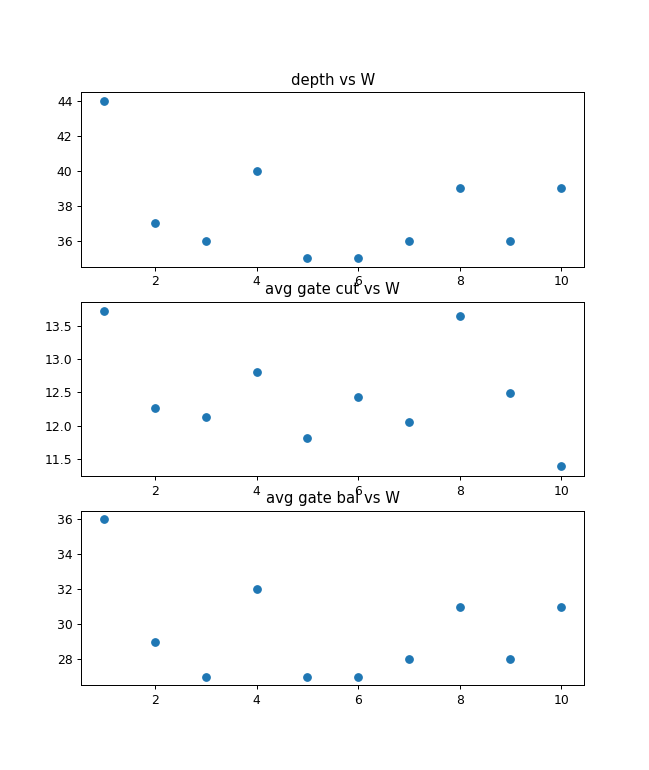

In [15]:
%matplotlib notebook
depth_list = [M.depth for M in MERA_list]
plt.subplot(311)
plt.scatter(W_list, depth_list)
plt.title("depth vs W")

plt.subplot(312)
cut_list = [np.mean(M.cut_list) for M in MERA_list]
plt.scatter(W_list, cut_list)
plt.title("avg gate cut vs W")
plt.show()

plt.subplot(313)
bal_list = [M.get_balance_metric() for M in MERA_list]
plt.scatter(W_list, bal_list)
plt.title("avg gate bal vs W")
plt.show()

In [35]:
level_map_list = [MERA_list[i].get_level_map() for i in range(10)]

<IPython.core.display.Javascript object>


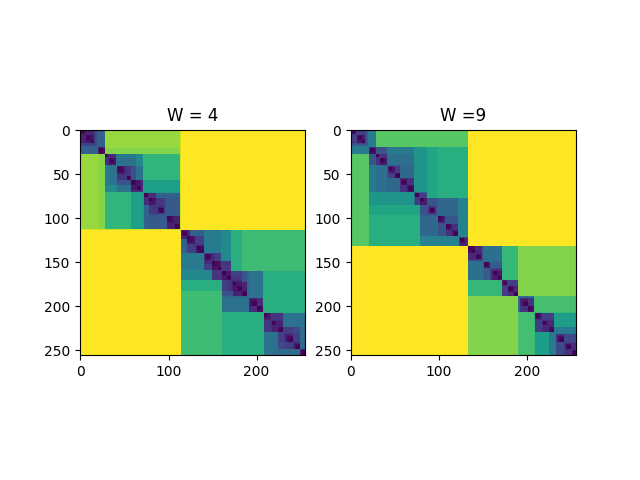

<IPython.core.display.Javascript object>


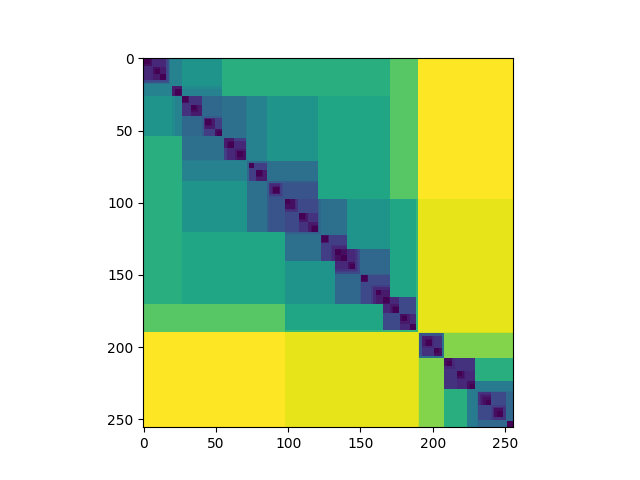

In [50]:
%matplotlib notebook
plt.subplot(121)
plt.imshow(level_map_list[3])
plt.title("W = 4")

plt.subplot(122)
plt.imshow(level_map_list[8])
plt.title("W =9")

plt.figure()
M = MERA("{}W_{}.txt".format(data_dir, 100))
lvl_100 = M.get_level_map()
plt.imshow(lvl_100, label="100")
plt.show()

In [7]:
dist_depth_list = [MERA_list[i].get_avg_dist_depth_list() for i in range(10)]
dist_depth_list_density = [np.array(dist_depth_list[i])/depth_list[i] for i in range(10)]

<IPython.core.display.Javascript object>


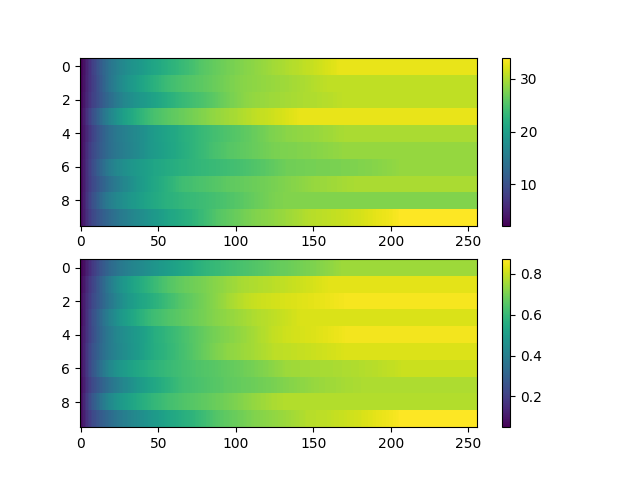

In [8]:
%matplotlib notebook
plt.subplot(211)
plt.imshow(np.array(dist_depth_list), aspect='auto')
plt.colorbar()

plt.subplot(212)
plt.imshow(np.array(dist_depth_list_density), aspect='auto')
plt.colorbar()

plt.show()

<IPython.core.display.Javascript object>


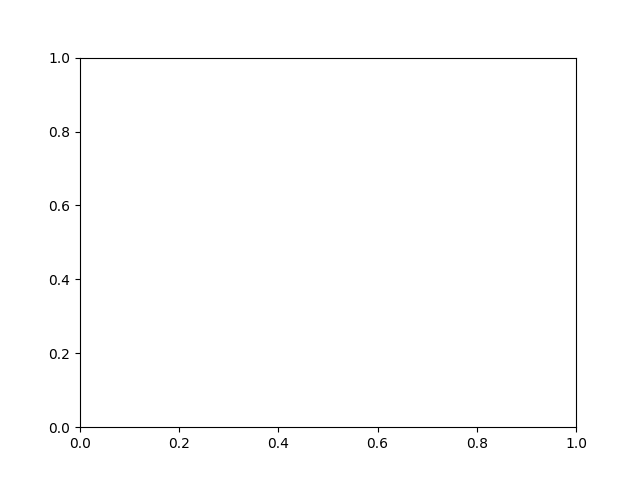

ValueError: x and y must have same first dimension, but have shapes (10,) and (1,)

In [22]:
%matplotlib notebook
for i in range(10):
    plt.plot(range(1,257), dist_depth_list[i], label="{}".format(i+1))
plt.legend(loc='best')


<IPython.core.display.Javascript object>


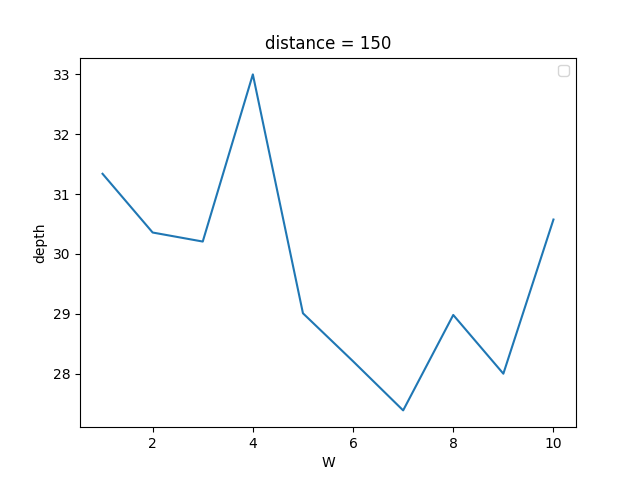

No handles with labels found to put in legend.


In [33]:
%matplotlib notebook
distance = 150
x = [np.array(dist_depth_list)[i][distance] for i in range(10)]
plt.plot(range(1,11), x)
plt.title("distance = {}".format(distance))
plt.xlabel("W")
plt.ylabel("depth")
plt.legend(loc='best')
plt.show()

In [19]:
np.array(dist_depth_list)[:,25]

array([16.47186147, 17.06493506, 15.87012987, 19.12554113, 15.40692641,
       15.18181818, 17.32034632, 15.96969697, 17.44155844, 14.87012987])

Below is stuff shown last week

<IPython.core.display.Javascript object>


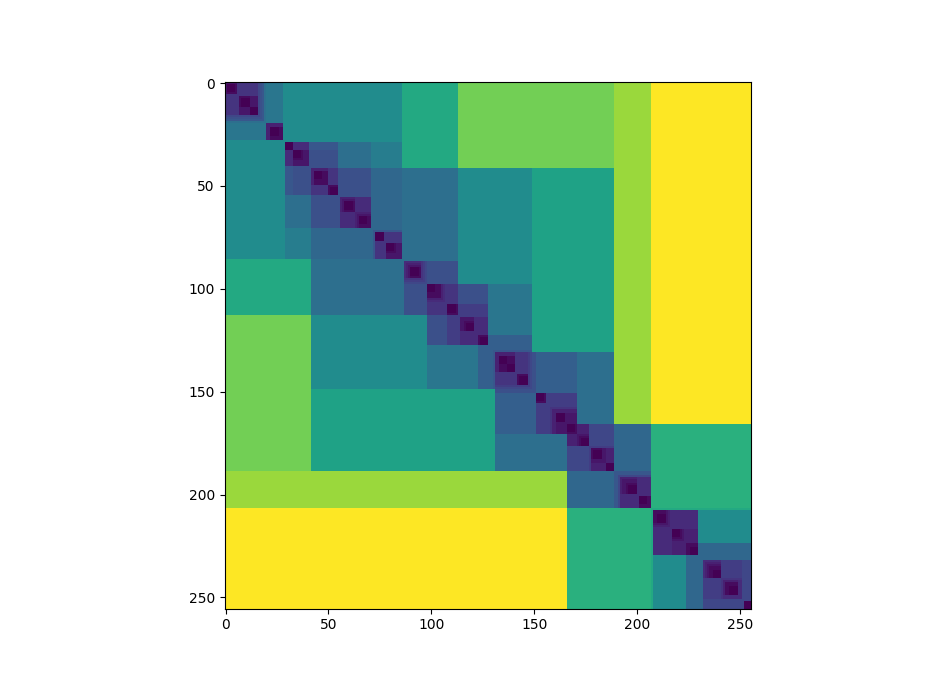

In [37]:
%matplotlib notebook
plt.imshow(level_map)

15
16
U26


<IPython.core.display.Javascript object>


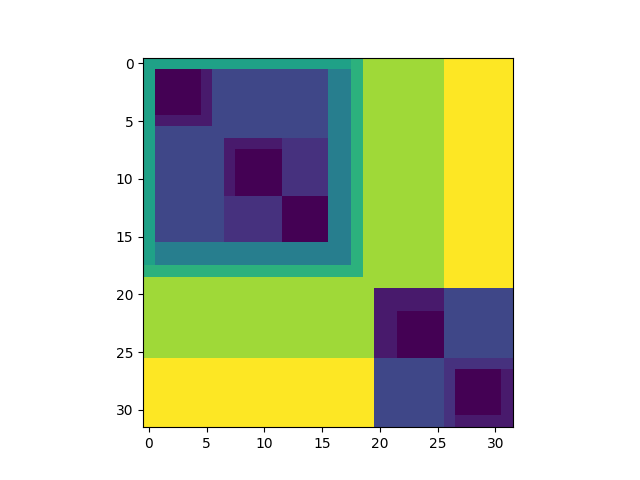

In [2]:
M = MERA("W_test.txt")
print(M.get_largest_level_from_path(1,31))
print(M.G.nodes[nx.lowest_common_ancestor(M.G, 1,31)]['level'])
print(nx.lowest_common_ancestor(M.G, 1,31))
level_map = M.get_level_map()
%matplotlib notebook
plt.imshow(level_map)

In [30]:
lvl_map1 = MERAs["1"][0].get_level_map()
lvl_map10 = MERAs["10"][0].get_level_map()

<IPython.core.display.Javascript object>


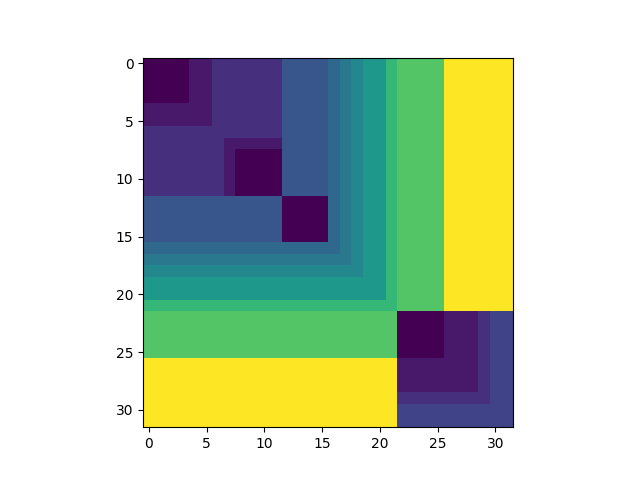

<IPython.core.display.Javascript object>


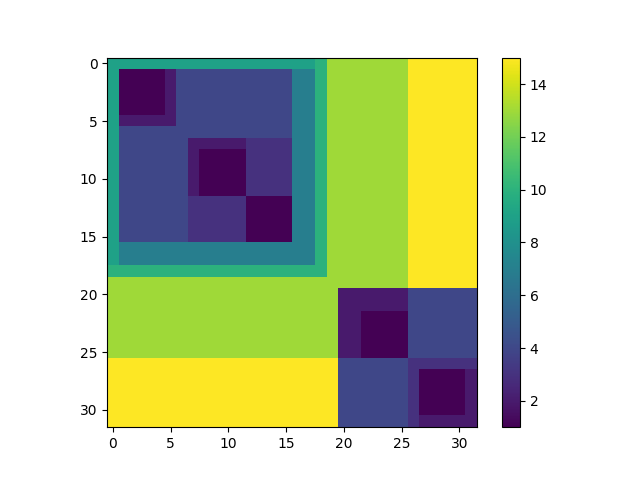

In [31]:
%matplotlib notebook
plt.imshow(lvl_map1)
plt.figure()
plt.imshow(lvl_map10)

plt.colorbar()
plt.show()

In [ ]:




f = open("MERA_diagnostics.p", 'rb')
MERA_diagnostics = pickle.load(f)

In [5]:
depth_list = [MERA_diagnostics[W][0][0] for W in W_list]
depth_error = [MERA_diagnostics[W][0][1] for W in W_list]

level_map_list = [MERA_diagnostics[W][1] for W in W_list]

cut_list = [MERA_diagnostics[W][2][0] for W in W_list]
cut_error = [MERA_diagnostics[W][2][1] for W in W_list]

In [6]:
print(depth_list)
print(depth_error)

[19.0, 20.0, 22.0, 21.0, 21.0]
[0.0, 0.0, 0.0, 0.0, 0.0]


[10.225806451612902, 7.774193548387098, 7.129032258064513, 7.967741935483872, 6.903225806451613]
[1.7763568394002505e-15, 8.881784197001252e-16, 2.6645352591003757e-15, 8.881784197001252e-16, 0.0]


<IPython.core.display.Javascript object>


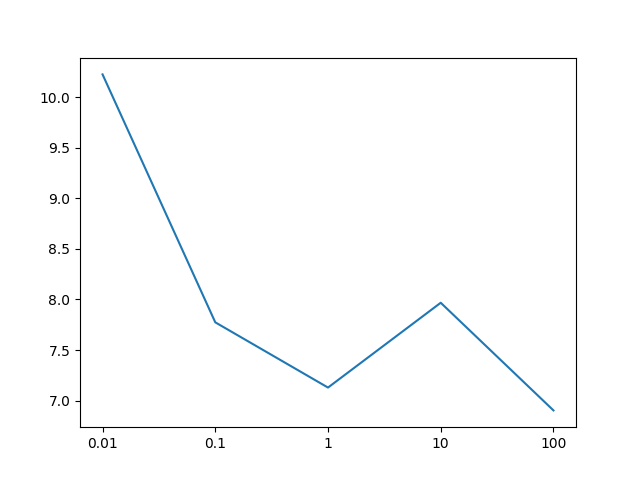

In [7]:
print(cut_list)
print(cut_error)
%matplotlib notebook
import matplotlib.pyplot as plt
plt.plot(W_list, cut_list)

<IPython.core.display.Javascript object>


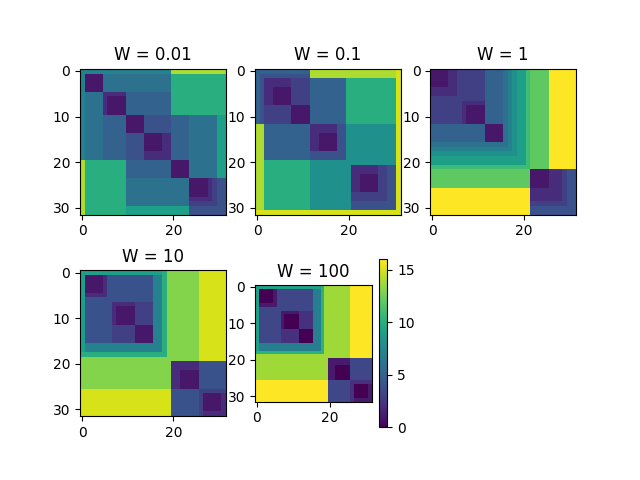

In [18]:
%matplotlib notebook
for i, W in enumerate(W_list):
    p = int("23" + str(i+1))
    plt.subplot(p)
    plt.imshow(level_map_list[i], vmin=0, vmax=16)
    plt.title("W = " + W)
plt.show()
plt.colorbar()

In [9]:
np.max(np.array(level_map_list))

16.0